In [36]:
#Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import RobustScaler

#Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

#Metrics
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

**Load and Clean data**


In [4]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape

(7043, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Convert SeniorCitizen to object
data['SeniorCitizen'] = data['SeniorCitizen'].apply(str)

#convert TotalCharges to float
data['TotalCharges'] = data['TotalCharges'].replace({" ":'0'})
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [10]:
#Let's delete unusefull features
data = data.drop('customerID', axis=1)

In [11]:
# Colonnes quantitative
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Colonnes qualitative
nominal_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [12]:
#Description of numericall variables
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


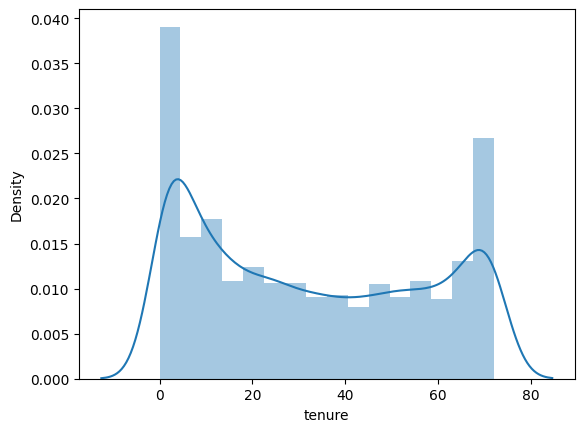

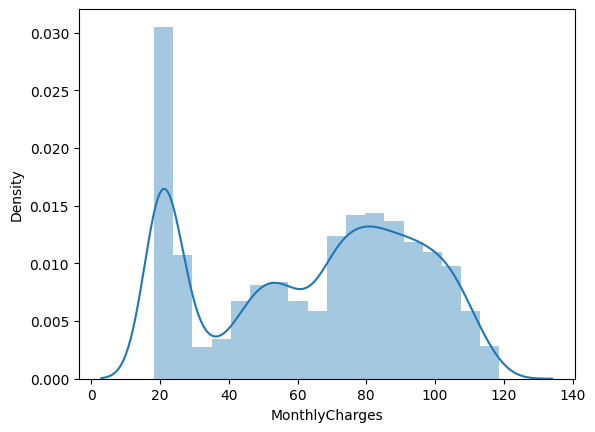

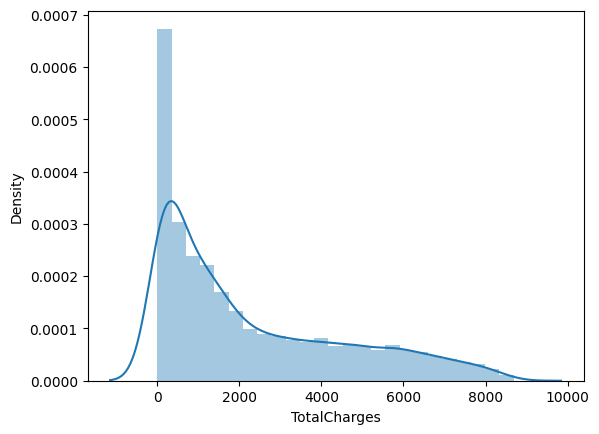

In [13]:
for col in data[numeric_features]:
    plt.figure()
    sns.distplot(data[col])

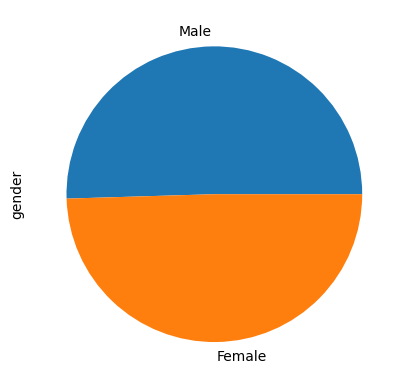

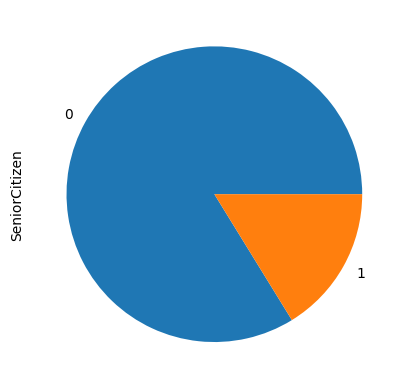

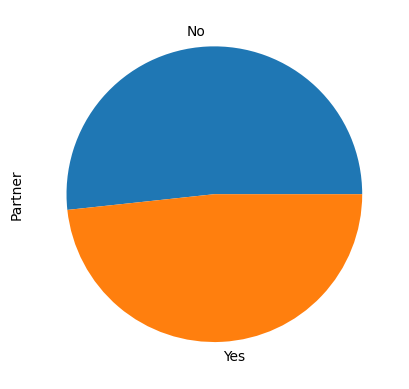

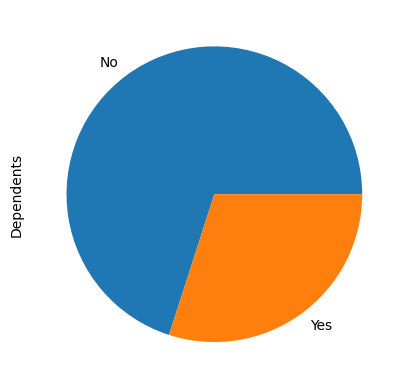

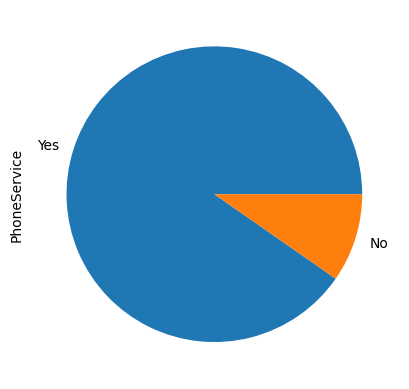

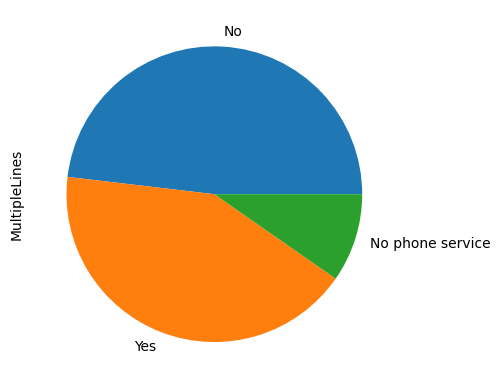

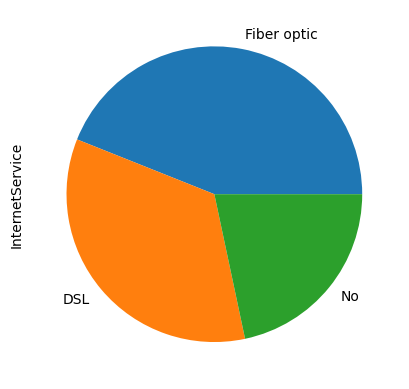

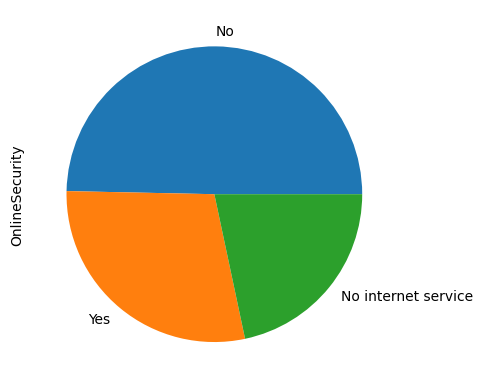

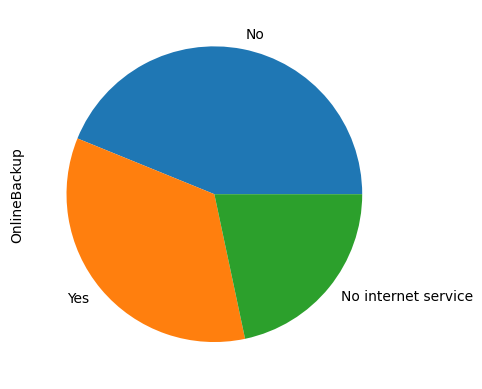

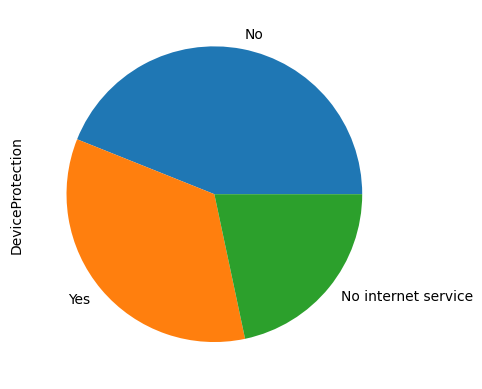

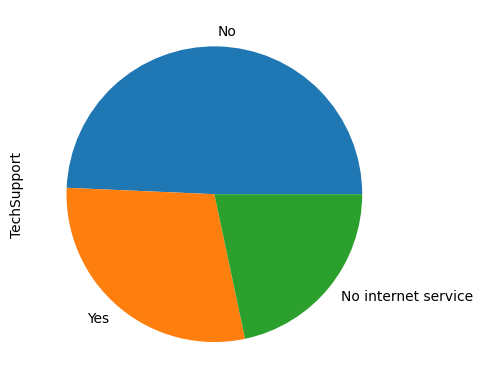

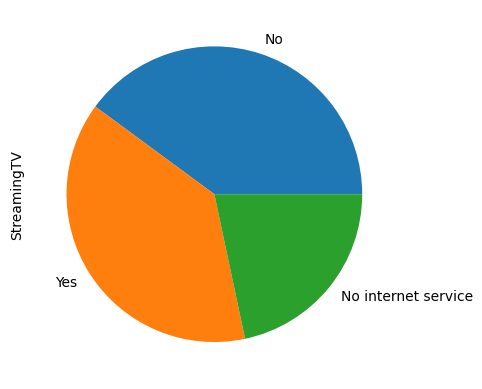

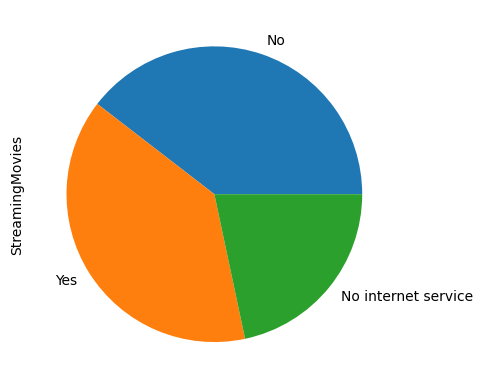

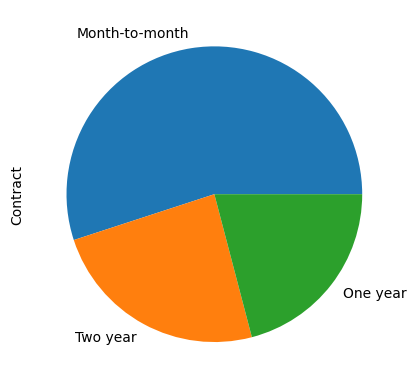

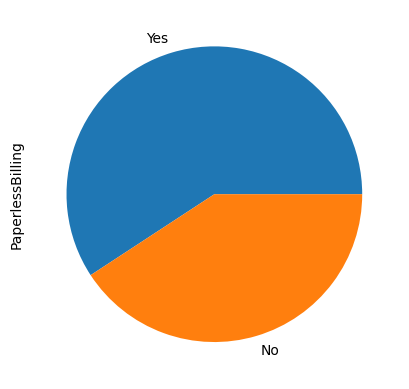

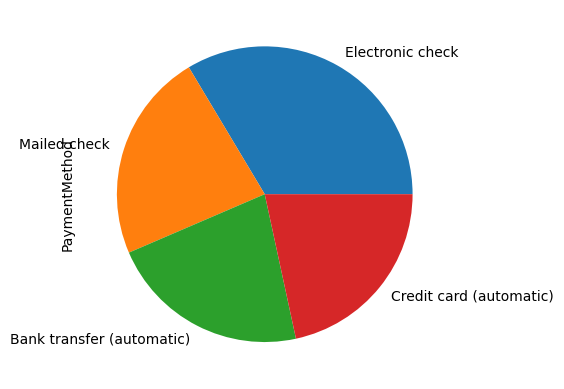

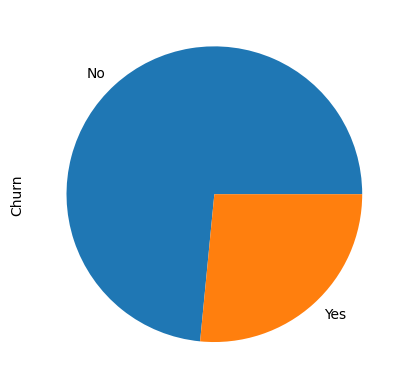

In [14]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

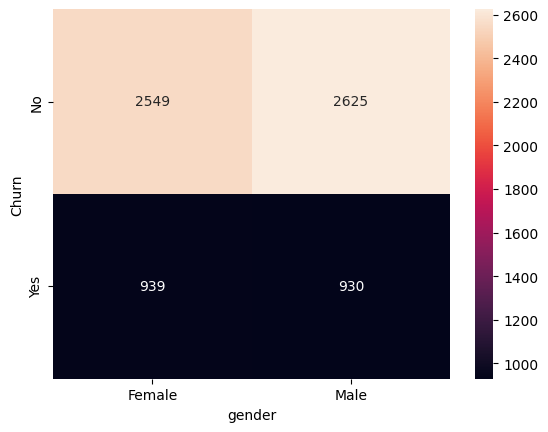

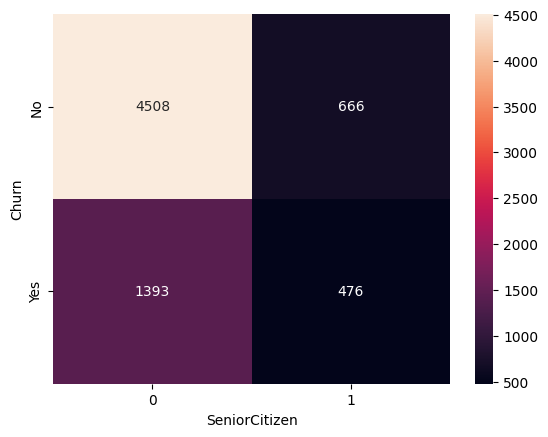

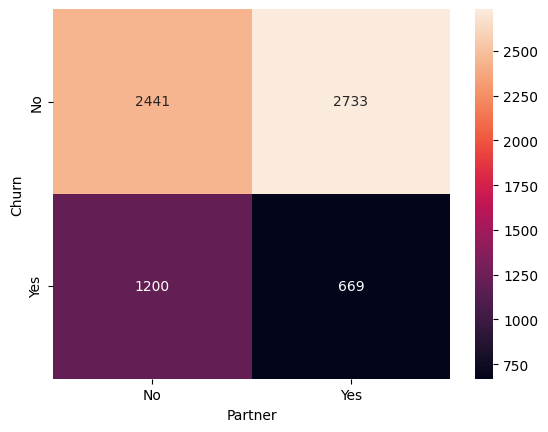

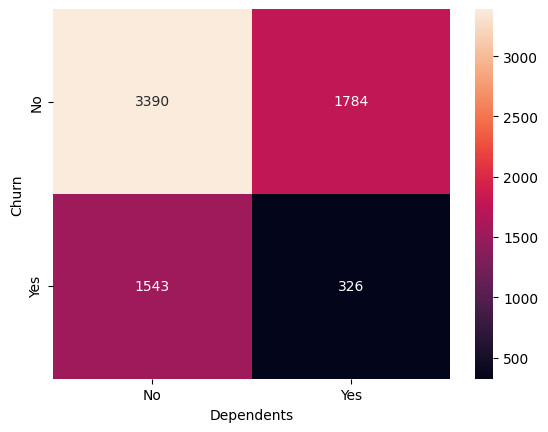

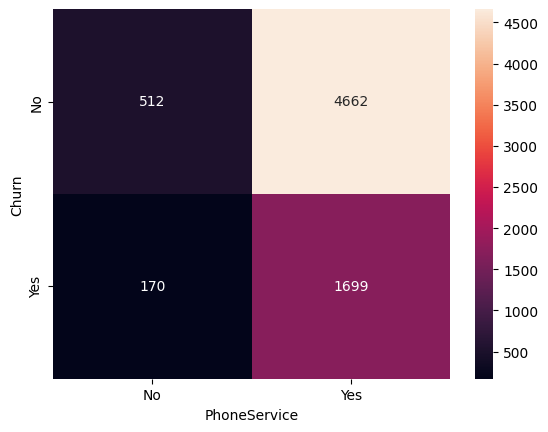

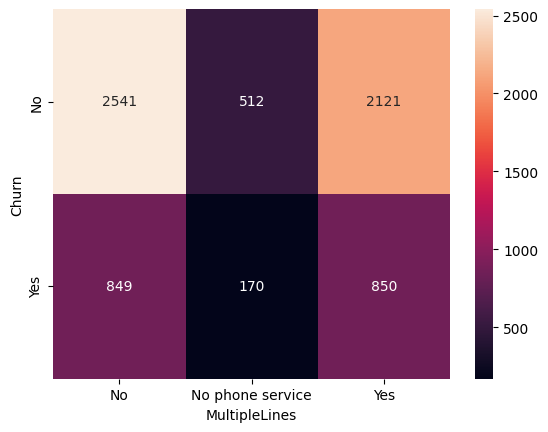

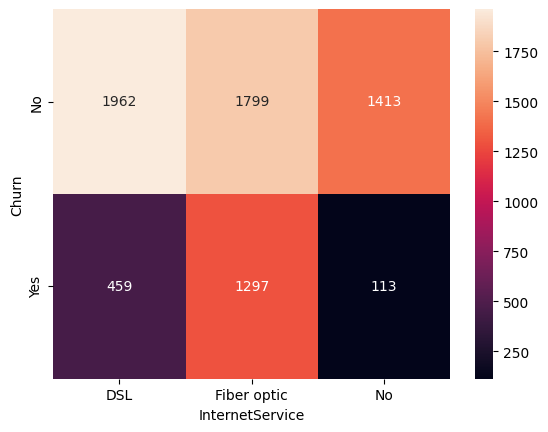

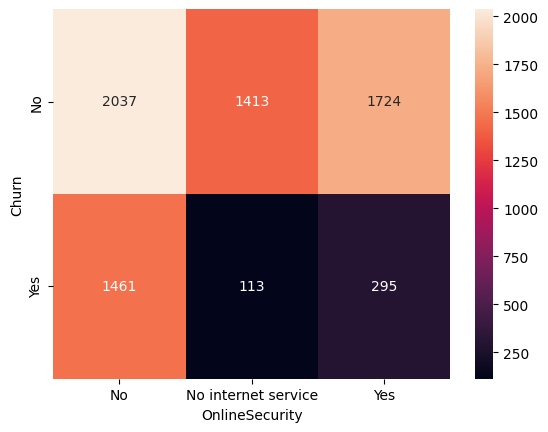

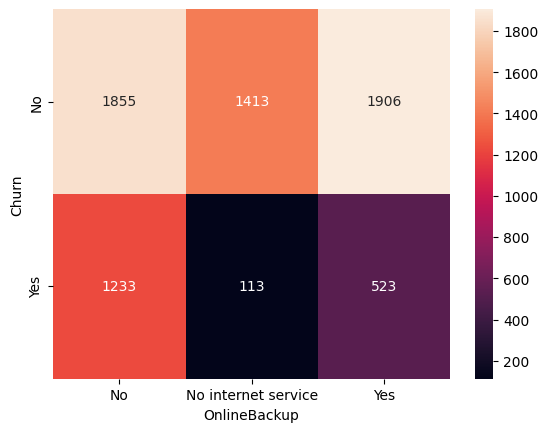

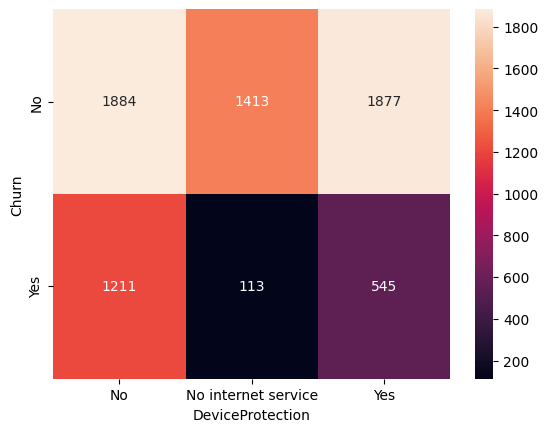

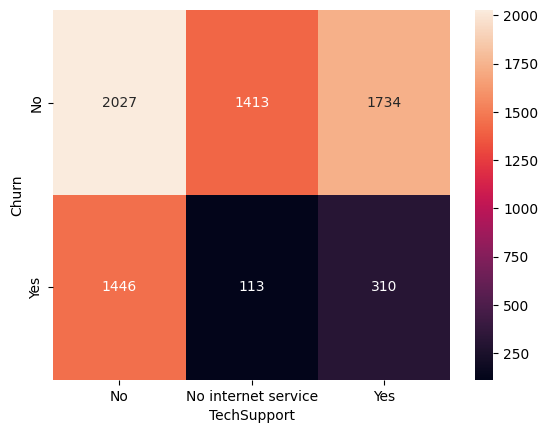

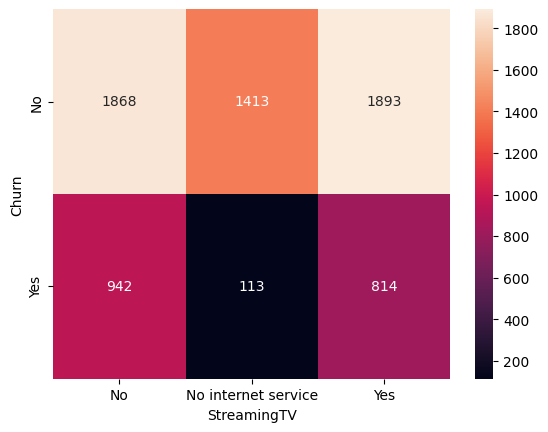

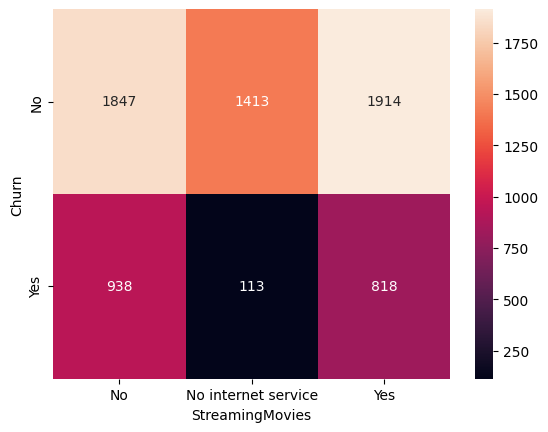

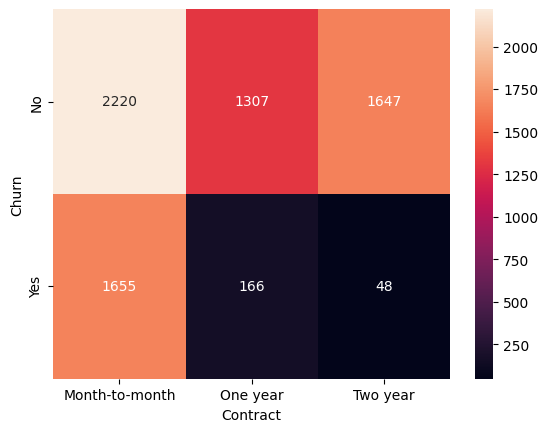

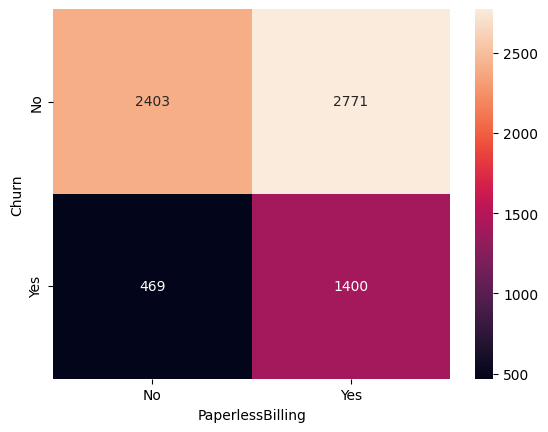

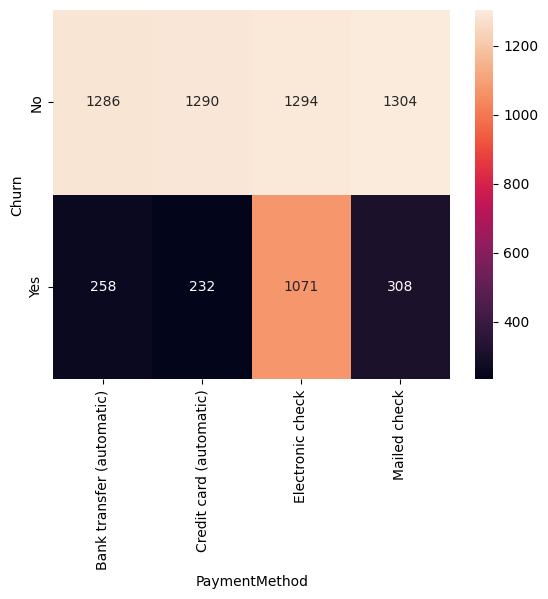

In [15]:
for col in nominal_features :
    plt.figure()
    sns.heatmap(pd.crosstab(data['Churn'], data[col]), annot=True, fmt='d')

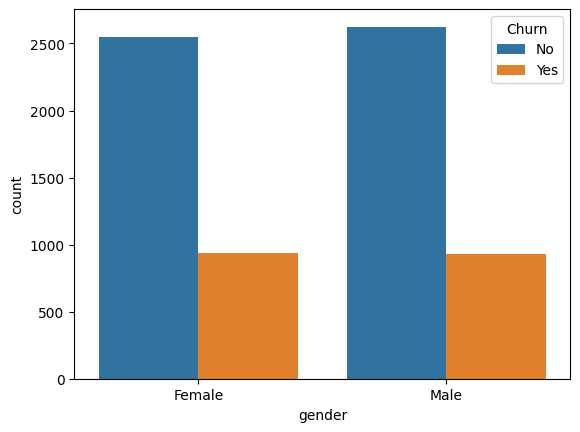

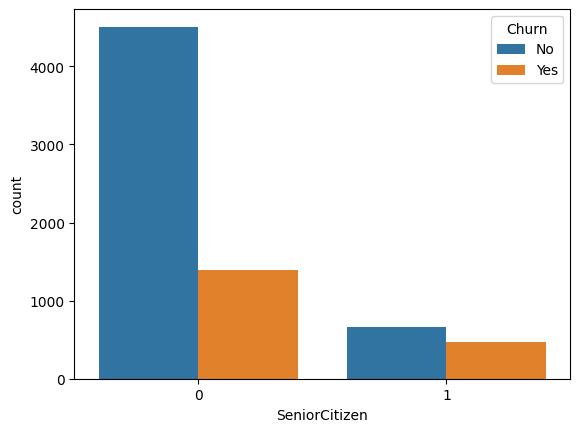

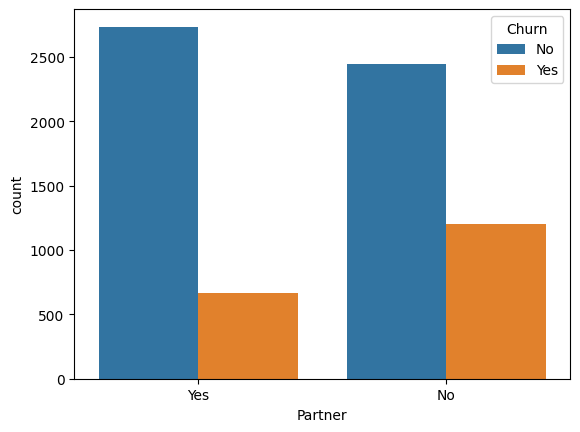

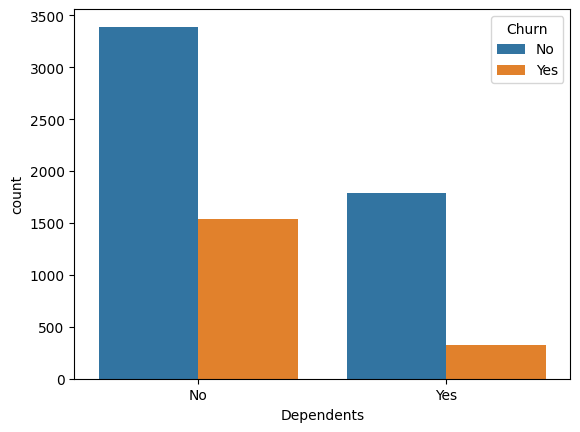

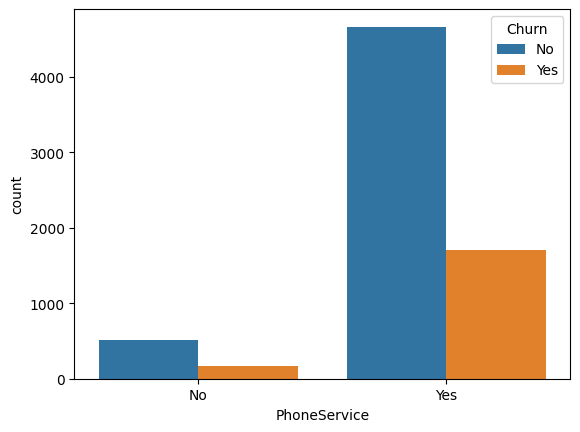

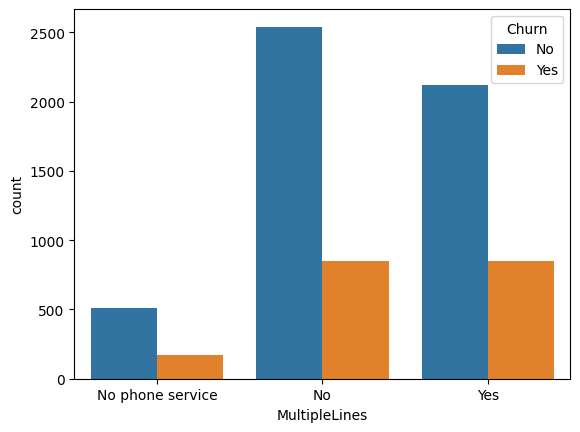

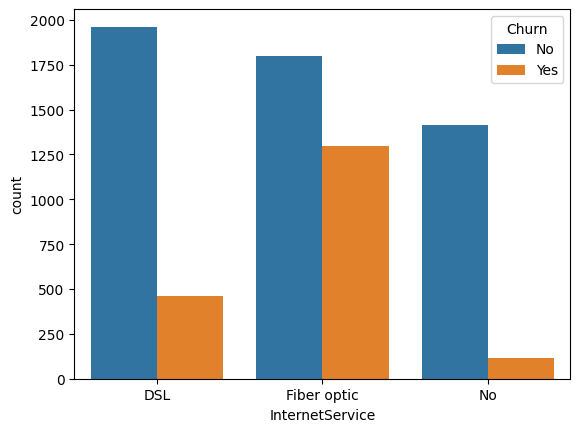

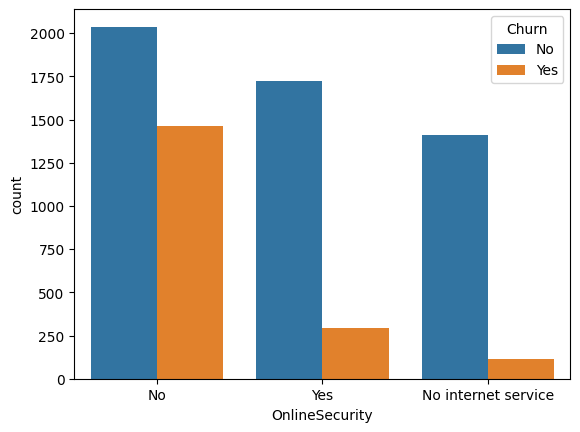

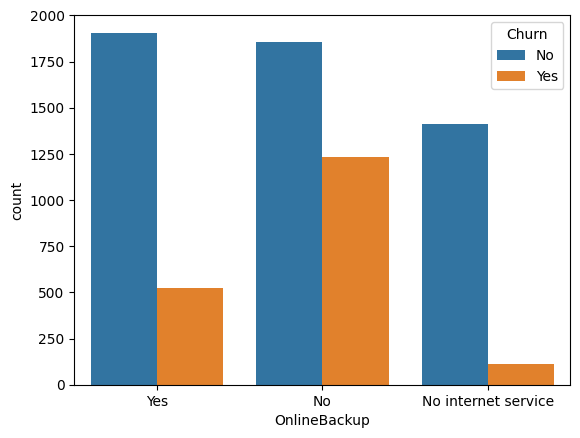

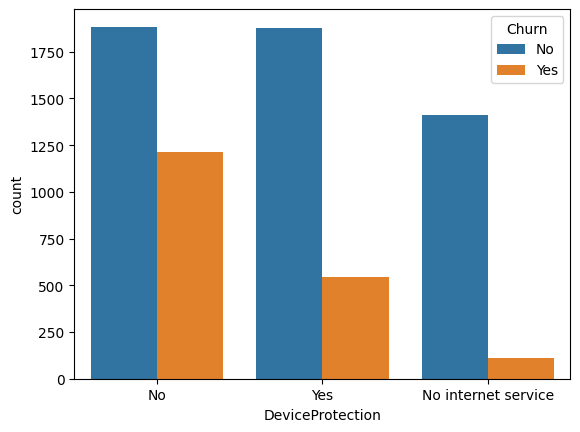

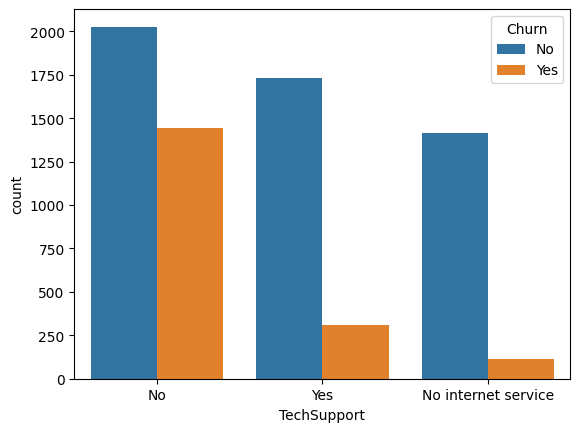

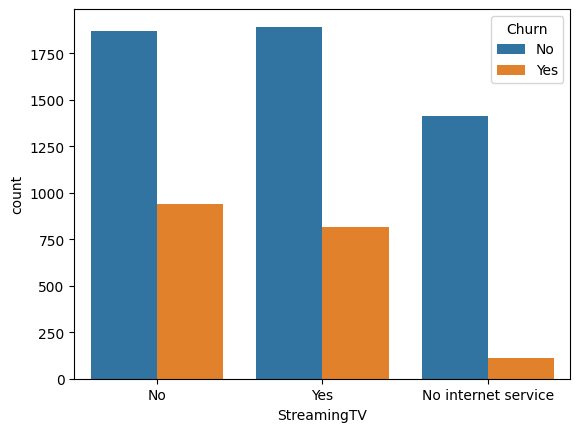

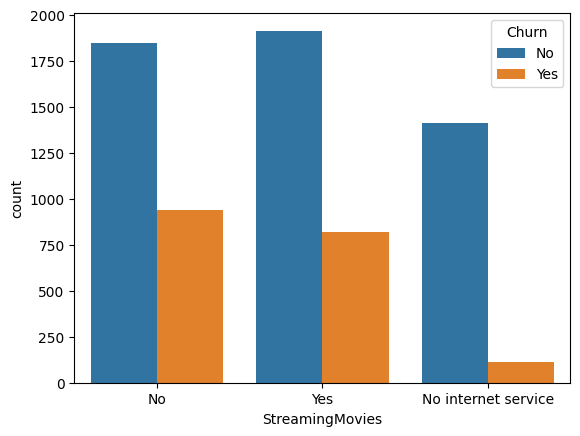

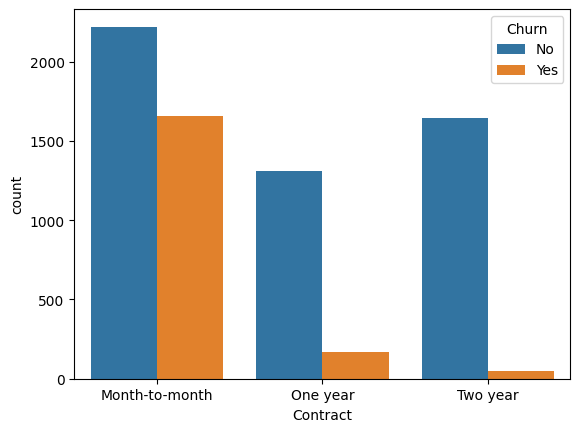

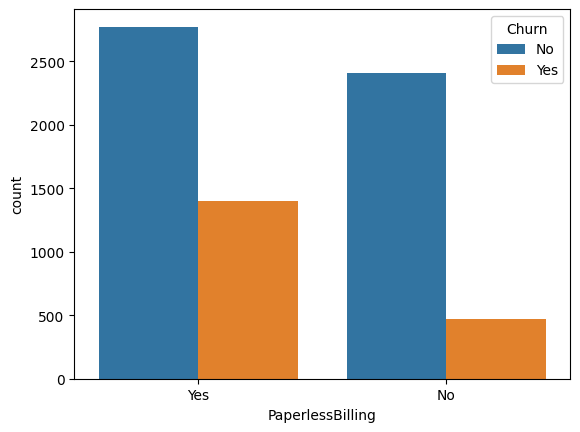

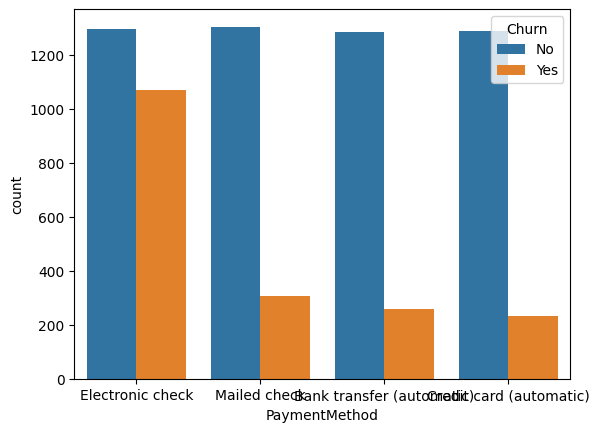

In [16]:
for col in nominal_features:
    plt.figure()
    sns.countplot(x=col, hue='Churn', data=data)

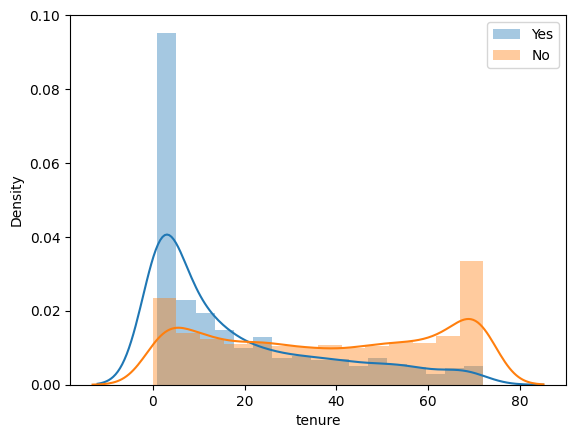

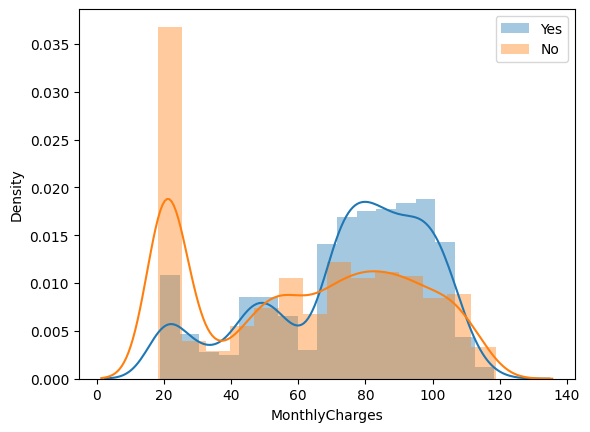

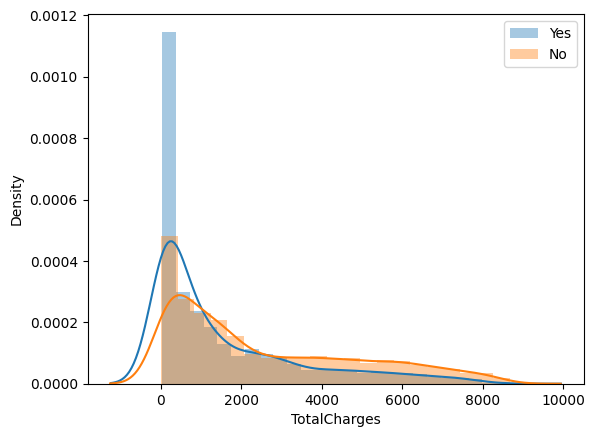

In [17]:
#chrun distribution for each numeric features
churn_df = data[data['Churn'] == 'Yes']
noChurn_df = data[data['Churn'] == 'No']

for col in numeric_features:
    plt.figure()
    sns.distplot(churn_df[col], label='Yes')
    sns.distplot(noChurn_df[col], label='No')
    plt.legend()

**Preprocessing**

In [18]:
df = data.copy()

In [19]:
#Splitting and training-testing
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
trainset['Churn'].value_counts(normalize=True)

No     0.733582
Yes    0.266418
Name: Churn, dtype: float64

In [20]:
testset['Churn'].value_counts(normalize=True)

No     0.738822
Yes    0.261178
Name: Churn, dtype: float64

In [21]:
#Encoding
#encoding for our services columns

#columns for label endoding
labelEndoding_cols =  ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling','Churn']

#columns for oneHot encoding
oneHot_cols = ['InternetService','Contract', 'PaymentMethod']

In [22]:
#create encoding function
def encoding(df):

    code = {'Male':1,
        'Female':0,
        '1':1,
        '0':0,
        'Yes':1,
       'No':0,
       'No internet service':0,
       'No phone service':0}

    for col in df[labelEndoding_cols].columns:
        df.loc[:,col] = df[col].map(code)

    df = pd.get_dummies(df,columns=['InternetService'],prefix='InternetService')
    df = pd.get_dummies(df,columns=['Contract'],prefix='Contract')
    df = pd.get_dummies(df,columns=['PaymentMethod'],prefix='PaymentMethod')

    return df


In [23]:
#preprocessing function
def preprocessing(df):

    df = encoding(df)

    X = df.drop('Churn',axis=1)
    y = df['Churn']

    print(y.value_counts())

    return X,y

In [24]:
X_train, y_train = preprocessing(trainset)

0    4133
1    1501
Name: Churn, dtype: int64


In [25]:
X_test, y_test = preprocessing(testset)

0    1041
1     368
Name: Churn, dtype: int64


**Model Selection**

In [26]:
#Evaluation funtion
def evaluation(name,model):
    model.fit(X=X_train, y=y_train)
    ypred = model.predict(X_test)

    print(name)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1,1,10))


    plt.figure(figsize=(12,8))
    plt.title(name)
    plt.plot(N,train_score.mean(axis=1), label='train score')
    plt.plot(N,val_score.mean(axis=1), label='val score')

In [28]:
preprocessor = make_pipeline(SelectKBest(f_classif,k=8))

In [31]:
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
LR = make_pipeline(preprocessor,LogisticRegression(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor,StandardScaler(), KNeighborsClassifier())

In [32]:
list_of_models = [DecisionTree,RandomForest,LogisticRegression,  SVM, KNN]

In [33]:
#ModelEvalutoion
dict_of_models = {'DecisionTree': DecisionTree,
                 'RandomForest': RandomForest,
                 'LR': LR,
                 'SVM': SVM,
                 'KNN': KNN
                 }

DecisionTree
[[851 190]
 [192 176]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1041
           1       0.48      0.48      0.48       368

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

RandomForest
[[902 139]
 [185 183]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1041
           1       0.57      0.50      0.53       368

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

LR
[[938 103]
 [183 185]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.50      0.56       368

    accuracy                           0.80      1409
   macro avg       0.74      0

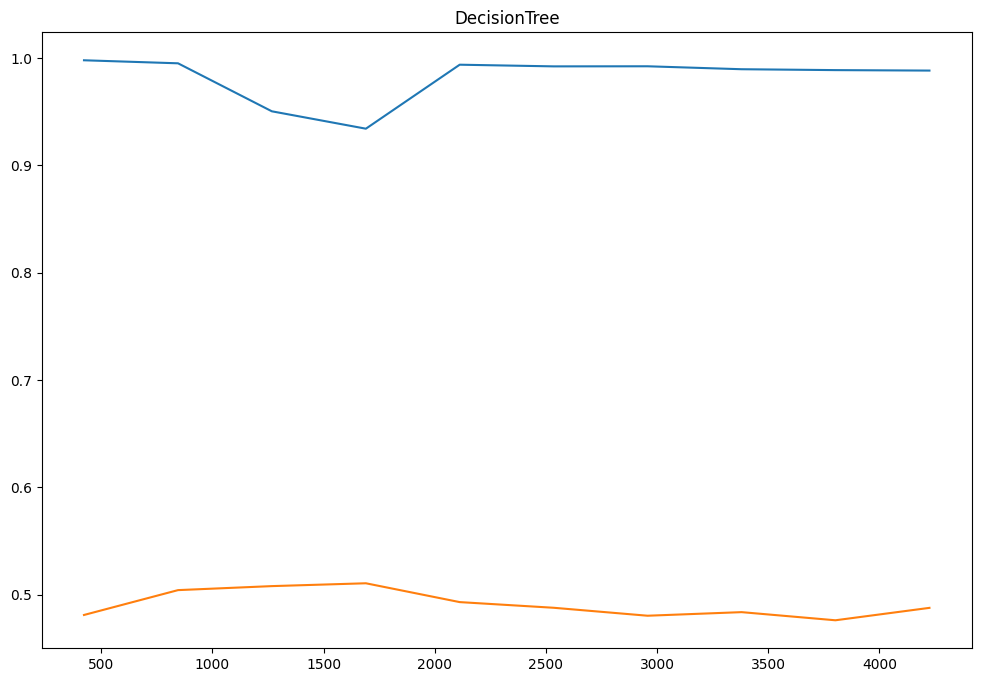

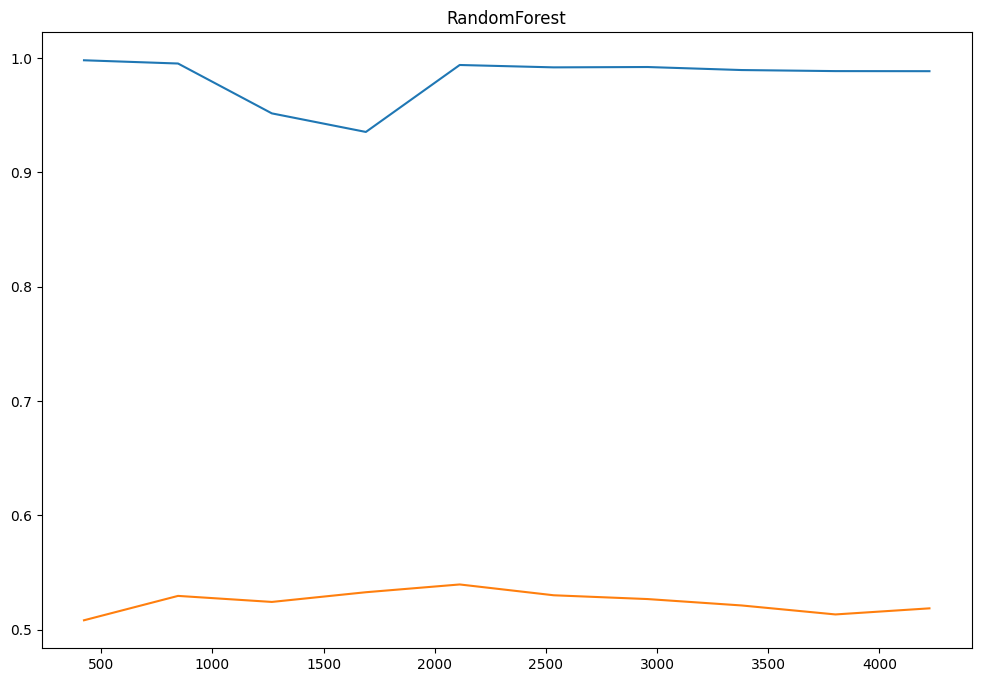

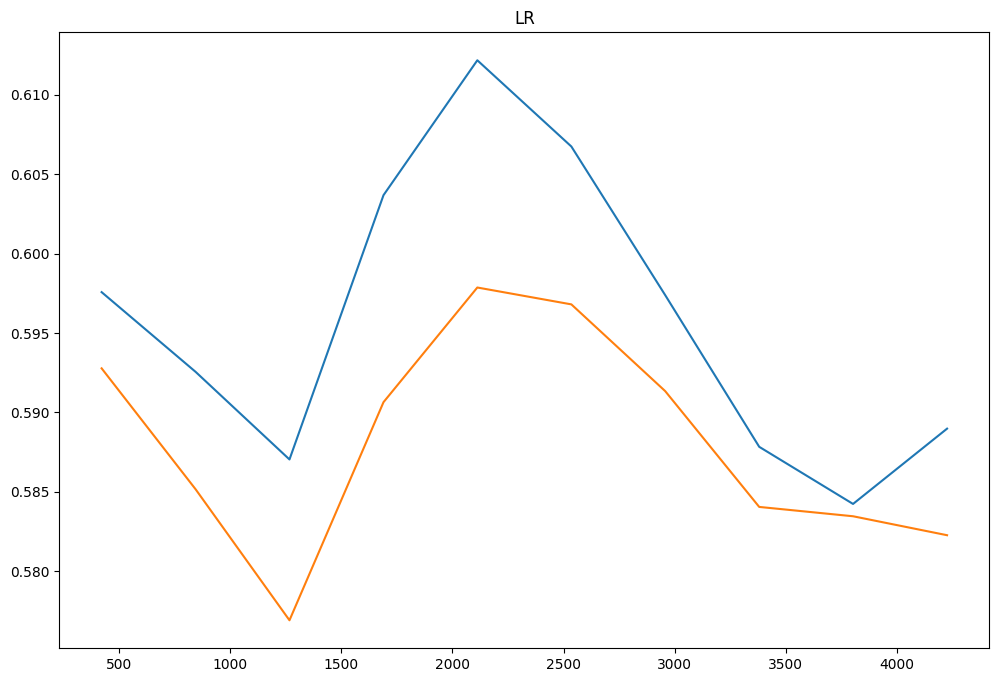

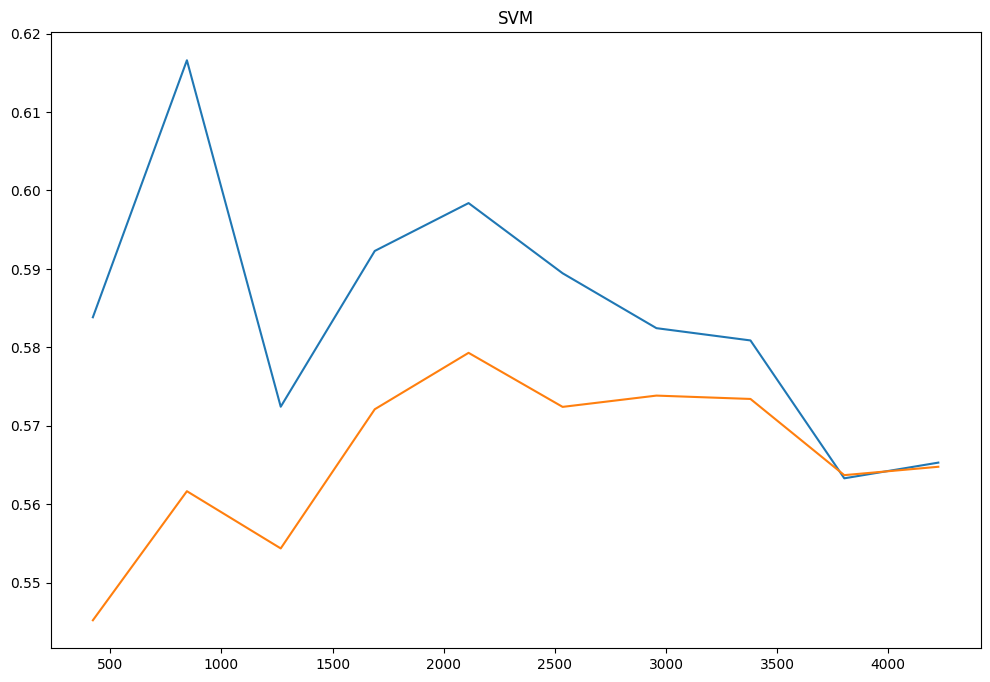

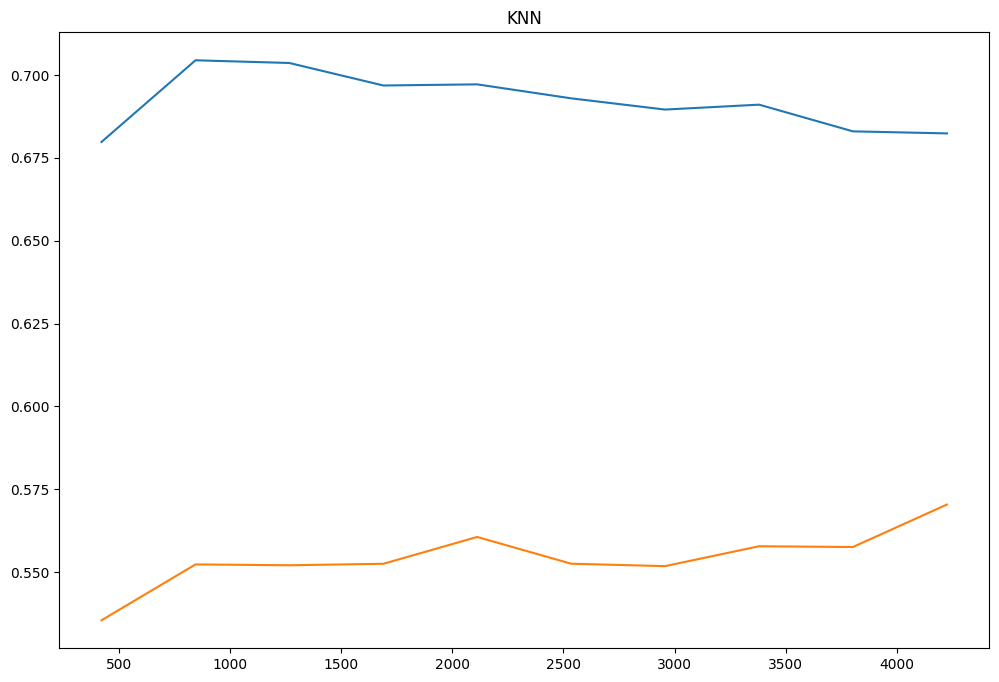

In [34]:
for name, model in dict_of_models.items():
    evaluation(name,model)